### Intoduction

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision. XYZ is interested in using actionable insights to help them identify the right company to make their investment.

### Datasets

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.
Below are the list of datasets which are provided for the analysis:

- **Cab_Data.csv** – this file includes details of transaction for 2 cab companies
- **Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details
- **Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode
- **City.csv** – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

- Review the Source Documentation
- Understand the field names and data types
- Identify relationships across the files
- Field/feature transformations
- Determine which files should be joined versus which ones should be appended
- Create master data and explain the relationship
- Identify and remove duplicates
- Perform other analysis like NA value and outlier detection


### Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta


### Load Datasets 

In [2]:
# load cab dataset
cab = pd.read_csv("Cab_Data.csv")

# look at a few rows of the cab_data file
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
# get information about cab dataset
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
# load transaction id dataset
transaction_id= pd.read_csv('Transaction_ID.csv')

# look at a few rows of the transaction_data file
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [5]:
# get information about transaction_id dataset
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [6]:
#Load customer id dataset
customer_id= pd.read_csv('Customer_ID.csv')

# look at a few rows of the customer_data file
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [7]:
# get information about customer_id dataset
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [8]:
#Load city dataset
city = pd.read_csv('City.csv')

# look at a few rows of the city_data file
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [9]:
# get information about customer_id dataset
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


###  Merge DataFrames

In [10]:
# creating master dataset
master_data= cab.merge(transaction_id, on= 'Transaction ID').merge(customer_id, on='Customer ID').merge(city, on='City')

# look at the first few rows of the master dataframe
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [11]:
# get information about merged dataset
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


### Data Cleaning

#### Handling Missing/Null Values

In [12]:
# count the number of null values in each columns
master_data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

#### Remove Unnecessary Characters

In [13]:
#replace spaces  with  underscores for column names and remove commas from Population and Users columns values.

master_data.columns= master_data.columns.str.replace(' ','_')


columns= ['Population', 'Users']

for column in columns:
    
    master_data[column]= master_data[column].str.replace(',','').astype('int64')
    

In [14]:
master_data.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Customer_ID', 'Payment_Mode',
       'Gender', 'Age', 'Income_(USD/Month)', 'Population', 'Users'],
      dtype='object')

#### Check Duplicates

In [15]:
#check duplicated values
master_data.duplicated().sum()

0

#### Parsing Dates

In [16]:
# Parsing dates

def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

master_data['Date_of_Travel']=master_data['Date_of_Travel'].apply(lambda x:to_date_format(x)) 



In [17]:
master_data['Date_of_Travel'].head()

0   2016-01-07
1   2018-07-20
2   2018-11-22
3   2016-01-05
4   2018-04-20
Name: Date_of_Travel, dtype: datetime64[ns]

#### Handling Outliers

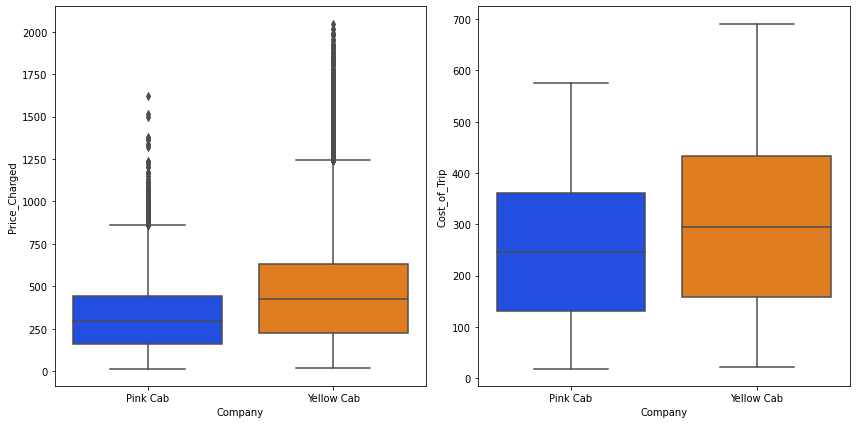

In [18]:
#  outliers detection for Price charged and Cost of trip
fig, (ax1, ax2)= plt.subplots(1,2, figsize= (12,6))

sns.boxplot(data= master_data, x='Company', y= 'Price_Charged', ax= ax1, palette= 'bright')
sns.boxplot(data= master_data, x='Company', y= 'Cost_of_Trip', ax= ax2, palette= 'bright')

plt.tight_layout()

There are few outliers for the Price Charged feature. 

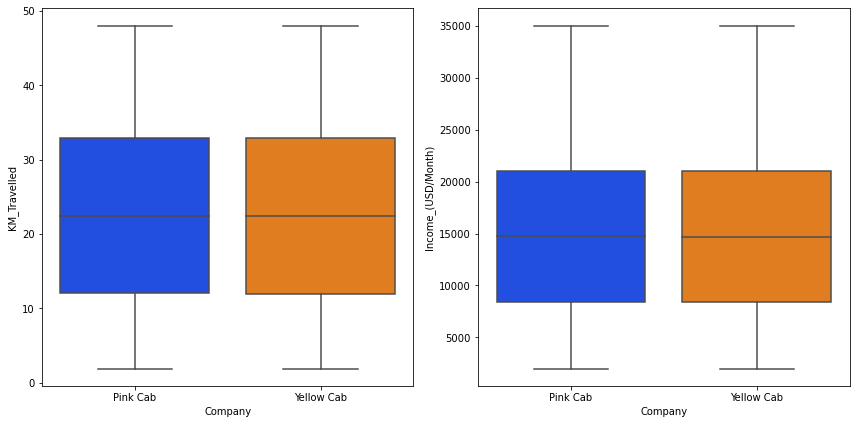

In [19]:
# Outlier detection for KM_travelled and Income
fig, (ax1, ax2)= plt.subplots(1,2, figsize= (12,6))

sns.boxplot(data= master_data, x='Company', y= 'KM_Travelled', ax= ax1, palette= 'bright')
sns.boxplot(data= master_data, x='Company', y= 'Income_(USD/Month)', ax= ax2, palette= 'bright')

plt.tight_layout()

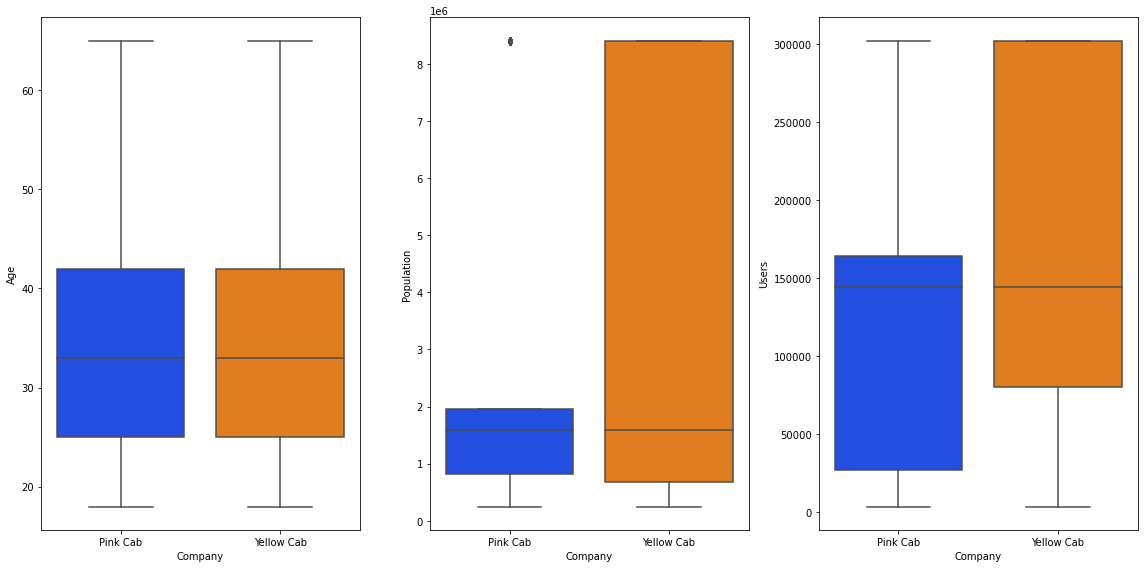

In [20]:
fig, (ax1, ax2, ax3)= plt.subplots(1,3, figsize= (16,8))

sns.boxplot(data= master_data, x='Company', y= 'Age', ax= ax1, palette= 'bright')
sns.boxplot(data= master_data, x='Company', y= 'Population', ax= ax2, palette= 'bright')
sns.boxplot(data= master_data, x='Company', y= 'Users', ax= ax3, palette= 'bright')

plt.tight_layout()

#### Features selection with correlation

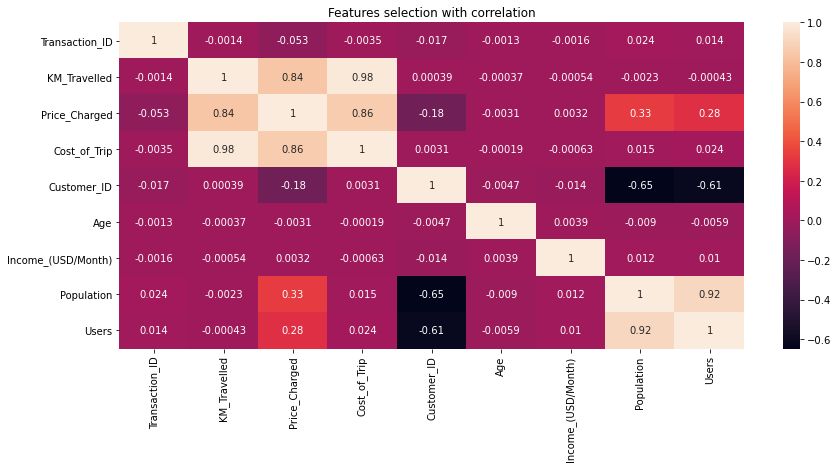

In [21]:
plt.figure(figsize= (14,6))
sns.heatmap(master_data.corr(), annot= True).set_title('Features selection with correlation');



An it can be seen above, there is high correlation between some of the variables. These are:

- 'Cost_of _Trip' and 'Price_Charged'
- 'Population' and 'Users'

I will not drop variables since I dont have enough information about them.

### Exploratory Data Analysis

In [22]:
# Basic descriptive statistics of numeric features 
master_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Transaction_ID,359392.0,1.022076e+07,1.268058e+05,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
KM_Travelled,359392.0,2.256725e+01,1.223353e+01,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price_Charged,359392.0,4.234433e+02,2.743789e+02,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost_of_Trip,359392.0,2.861901e+02,1.579937e+02,19.0,1.512000e+02,282.48,4.136832e+02,691.20
Customer_ID,359392.0,1.919165e+04,2.101241e+04,1.0,2.705000e+03,7459.00,3.607800e+04,60000.00
Age,359392.0,3.533670e+01,1.259423e+01,18.0,2.500000e+01,33.00,4.200000e+01,65.00
Income_(USD/Month),359392.0,1.504882e+04,7.969409e+03,2000.0,8.424000e+03,14685.00,2.103500e+04,35000.00
Population,359392.0,3.132198e+06,3.315194e+06,248968.0,6.712380e+05,1595037.00,8.405837e+06,8405837.00
Users,359392.0,1.583656e+05,1.008501e+05,3643.0,8.002100e+04,144132.00,3.021490e+05,302149.00


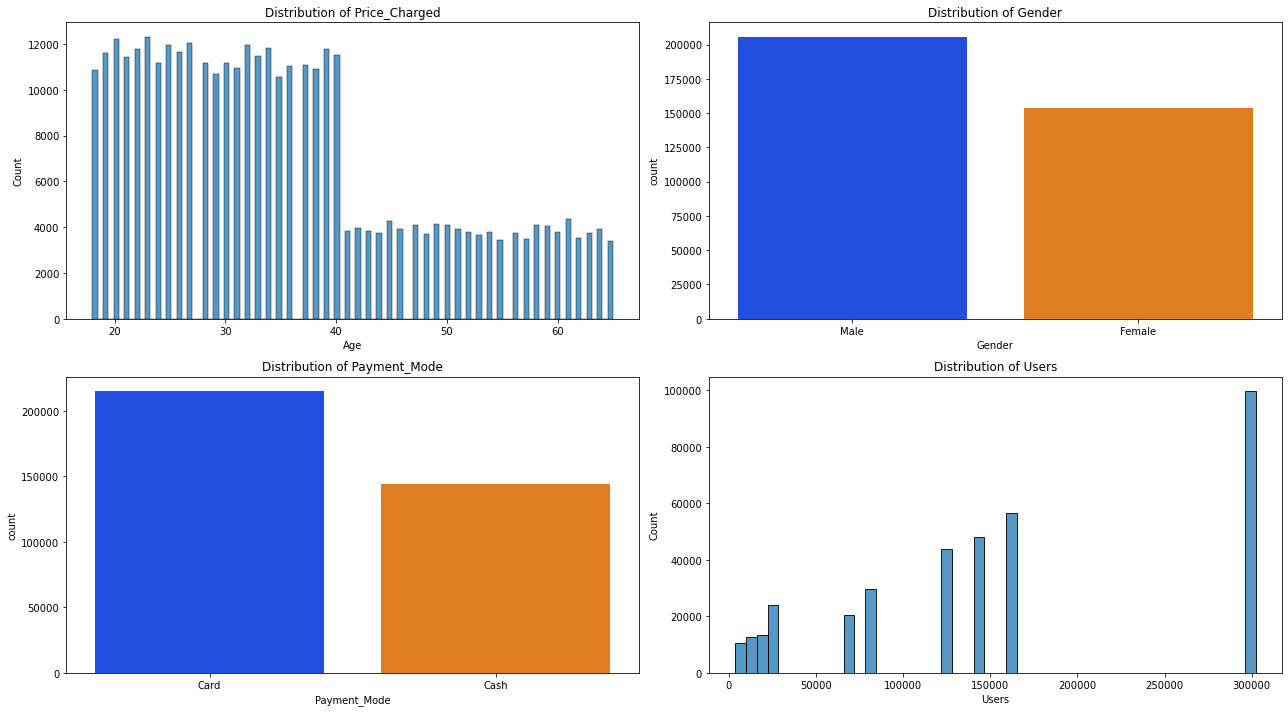

In [23]:
fig, axes= plt.subplots(2,2, figsize= (18,10))

sns.histplot(data=master_data, ax=axes[0,0], x='Age', palette= 'bright')
sns.countplot(data=master_data, ax=axes[0,1], x= 'Gender', palette= 'bright')
sns.countplot(data=master_data, ax=axes[1,0], x= 'Payment_Mode', palette= 'bright')
sns.histplot(data=master_data, ax=axes[1,1], x= 'Users',palette= 'bright')

axes[0,0].set_title('Distribution of Price_Charged')
axes[0,1].set_title('Distribution of Gender')
axes[1,0].set_title('Distribution of Payment_Mode')
axes[1,1].set_title('Distribution of Users')

plt.tight_layout()

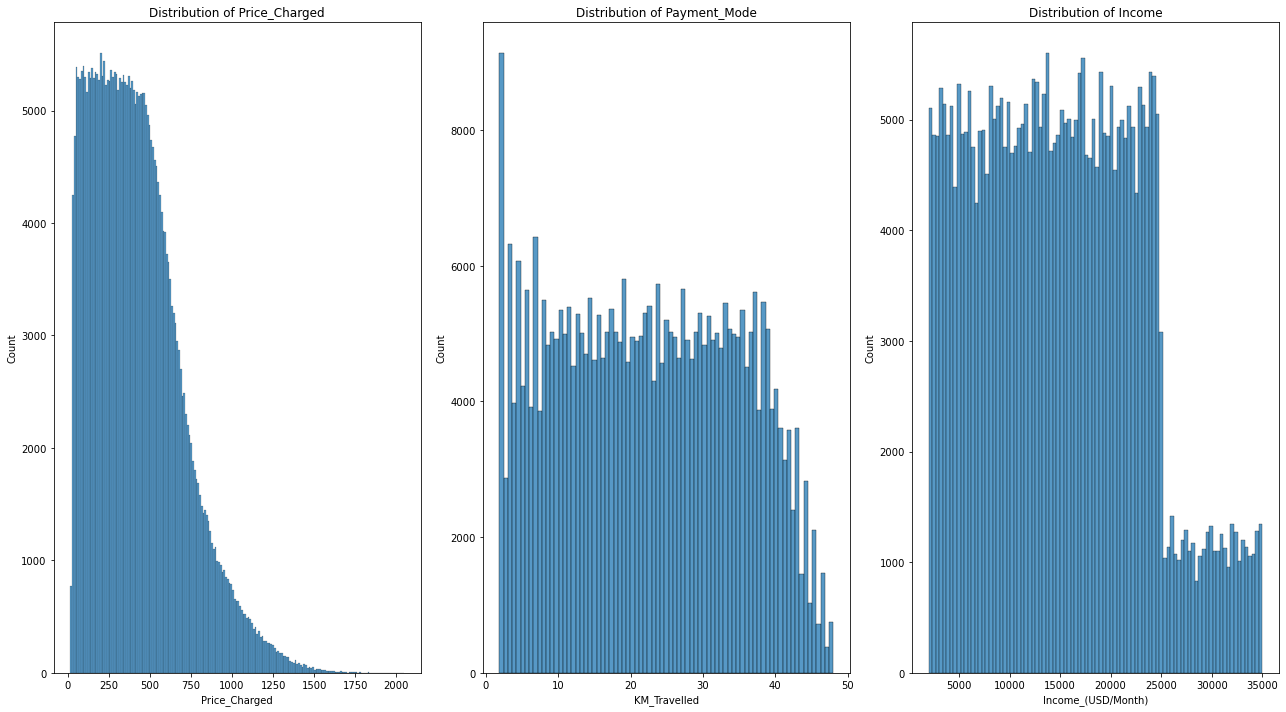

In [24]:
fig, axes= plt.subplots(1,3, figsize= (18,10))

sns.histplot(data=master_data, ax=axes[0], x='Price_Charged', palette= 'bright')
sns.histplot(data=master_data, ax=axes[1], x= 'KM_Travelled', palette= 'bright')
sns.histplot(data=master_data, ax=axes[2], x= 'Income_(USD/Month)', palette= 'bright');

axes[0].set_title('Distribution of Price_Charged')
axes[1].set_title('Distribution of Payment_Mode')
axes[2].set_title('Distribution of Income')

plt.tight_layout()


### Hypotheses Testing

#### Market Share

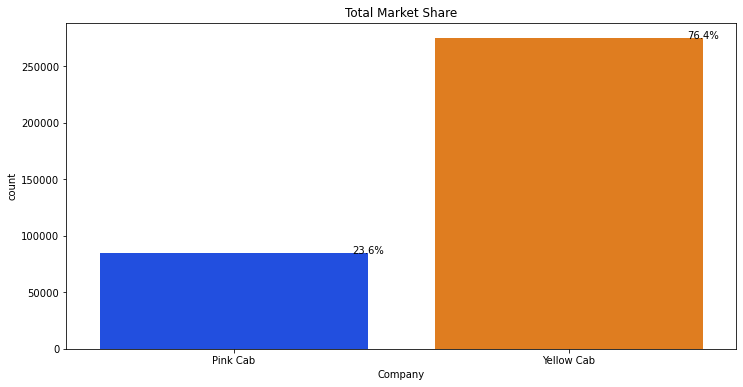

In [25]:
# Total market share

plt.figure(figsize= (12,6))

total = float(len(master_data))

ax= sns.countplot(data= master_data, x= 'Company', palette='bright')
plt.title('Total Market Share')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

####  Seasonality and demand Analysis

In [26]:
#Adding year, month and day columns to the master dataframe so that we can test if there is seasonality in the cab business

master_data['Year'] = master_data['Date_of_Travel'].dt.year
master_data['Month']= master_data['Date_of_Travel'].dt.month
master_data['Date']= master_data['Date_of_Travel'].dt.day

master_data.head(3)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year,Month,Date
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,2016,1,7
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,2018,7,20
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,2018,11,22


In [27]:
pd.DataFrame(master_data.groupby(['Year', 'Company']) ['Users'].sum())

Users
Year Company                
2016 Pink Cab     3157129931
     Yellow Cab  13949013152
2017 Pink Cab     3812654845
     Yellow Cab  16533576895
2018 Pink Cab     3669138612
     Yellow Cab  15793809907

In [28]:
# Creating seasons

master_data['Seasons']= master_data['Date_of_Travel'].dt.month % 12 // 3 + 1

In [29]:
# numbers of users by season

index= {1: 'Winter', 2: 'Summer', 3: 'Spring', 4:'Fall' }

pd.DataFrame(data= master_data.groupby(['Seasons', 'Company']) ['Users'].sum()).rename(index= index)


Users
Seasons Company                
Winter  Pink Cab     2478091038
        Yellow Cab  11444457368
Summer  Pink Cab     1523566709
        Yellow Cab   8888578758
Spring  Pink Cab     2480625190
        Yellow Cab  10563147151
Fall    Pink Cab     4156640451
        Yellow Cab  15380216677

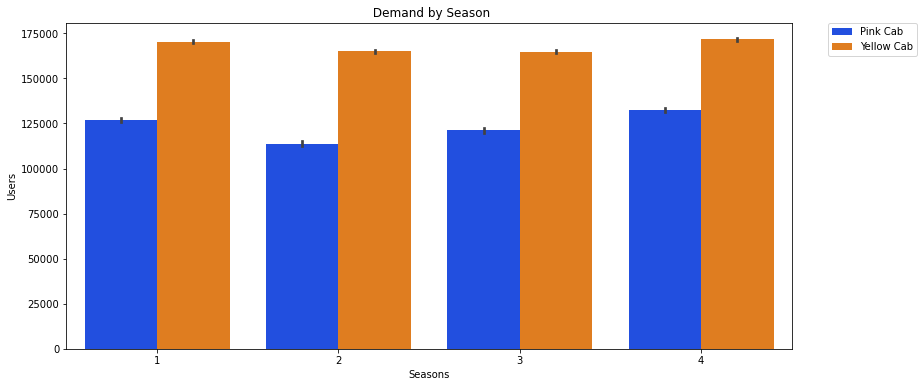

In [30]:
# Demand by Season
plt.figure(figsize= (13,6))

sns.barplot(data= master_data, x='Seasons', y= 'Users', hue= 'Company',palette= 'bright')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.title(' Demand by Season');



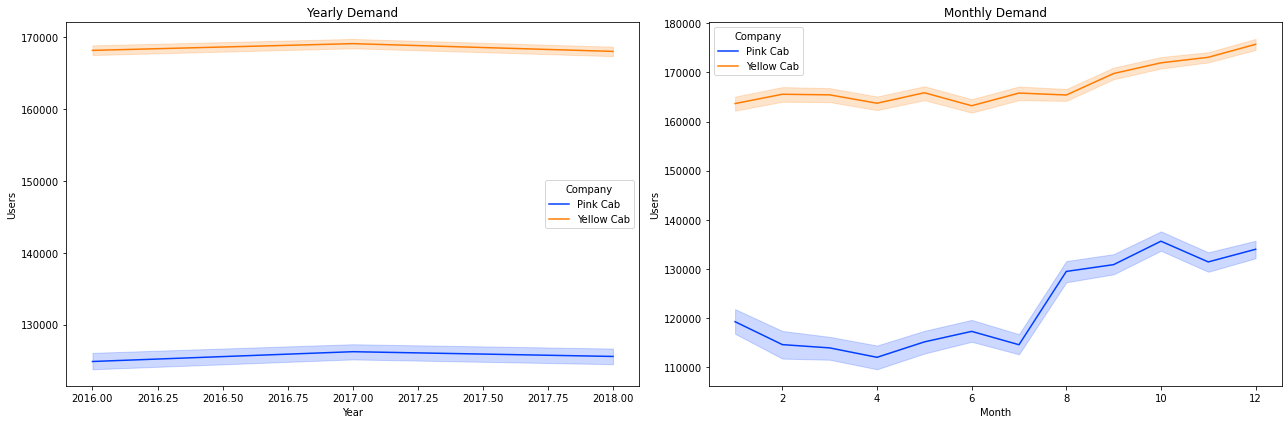

In [31]:
# monthly and yearly demand

fig, axes= plt.subplots(1,2, figsize= (18,6))

sns.lineplot(data= master_data, ax=axes[0], x= 'Year', y= 'Users', hue= 'Company', palette= 'bright')
sns.lineplot(data= master_data, ax=axes[1], x= 'Month', y= 'Users', hue= 'Company', palette= 'bright')

axes[0].set_title('Yearly Demand')
axes[1].set_title('Monthly Demand')

plt.tight_layout()


- From the above figure we can conclude that,  the demand for cab service slightly decreased in 2018 as compared to year 2017. 

- Yellow cab company has more customers than that of  its competitor pink company.

- Demand for cab service is higher in  the winter time and low in  the summertime. 


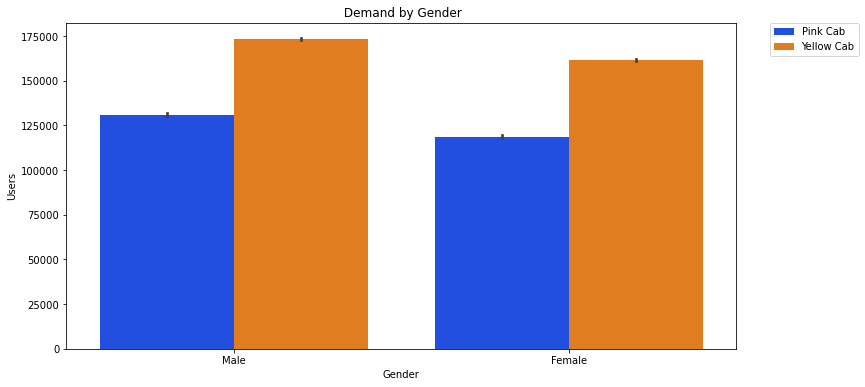

In [32]:
# demand by gender

plt.figure(figsize=(12,6))


ax= sns.barplot(data= master_data,  x='Gender', y= 'Users', hue= 'Company',palette= 'bright' )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.title(' Demand by Gender');


In [33]:
# damand citywise
pd.DataFrame(data= master_data.groupby(['City', 'Company']) ['Users'].sum()).sort_values(by= 'Users', ascending= False).head(10)

Users
City           Company                
NEW YORK NY    Yellow Cab  25960037782
CHICAGO IL     Yellow Cab   7773415552
WASHINGTON DC  Yellow Cab   5085755045
NEW YORK NY    Pink Cab     4220115083
LOS ANGELES CA Yellow Cab   4059910176
               Pink Cab     2863182180
BOSTON MA      Yellow Cab   1960994626
CHICAGO IL     Pink Cab     1539584948
SAN DIEGO CA   Pink Cab      746986640
               Yellow Cab    687070920

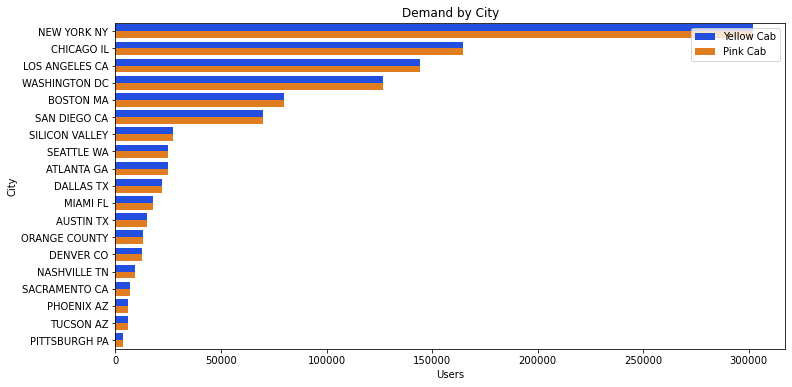

In [34]:
# demand by City
plt.figure(figsize=(12,6))

sns.barplot(data= master_data.sort_values(by= 'Users', ascending= False), x= 'Users', y='City', orient= 'h', hue='Company',palette= 'bright')

plt.legend(loc='upper right')

plt.title('Demand by City');


In [35]:
# creating age group

bins= bins= [0,24,34,44,54,64, 74]
labels = ['Under_25', 'Age_25-34', 'Age_35-44','Age_45-54', 'Age_55-64', 'Age_65-74']

master_data['Age_Group'] = pd.cut(master_data['Age'], bins= bins, labels= labels)


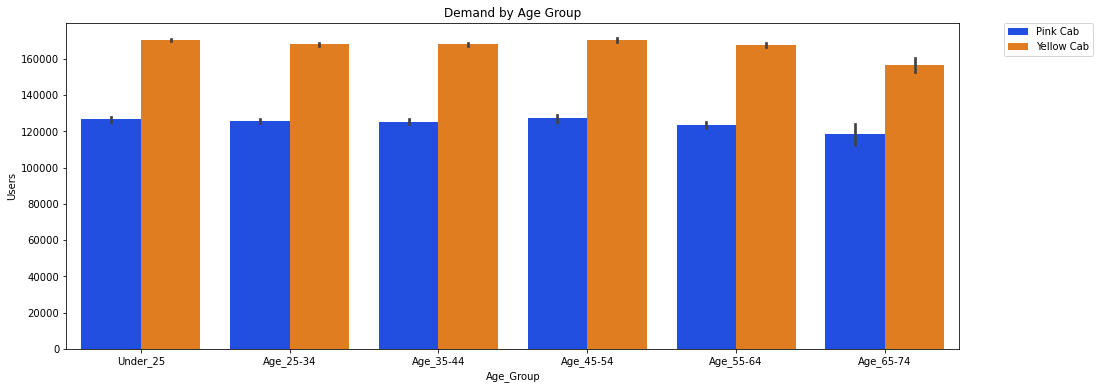

In [36]:
# demand by age group

plt.figure(figsize= (16,6))
sns.barplot(data= master_data,  x= 'Age_Group', y= 'Users', hue= 'Company',palette= 'bright')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.title('Demand by Age Group');

#### Cost Analysis

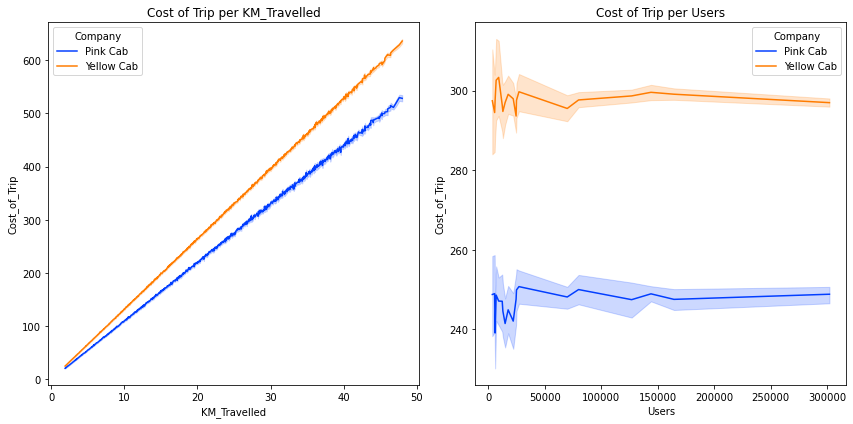

In [37]:
# Cost of trip per km_travelled  and user

fig, axes= plt.subplots(1,2, figsize= (12,6))

sns.lineplot(data= master_data, ax=axes[0], x= 'KM_Travelled', y= 'Cost_of_Trip', hue= 'Company', palette='bright')
sns.lineplot(data= master_data, ax=axes[1], x= 'Users', y= 'Cost_of_Trip', hue= 'Company', palette='bright')

axes[0].set_title('Cost of Trip per KM_Travelled')
axes[1].set_title('Cost of Trip per Users')

plt.tight_layout()

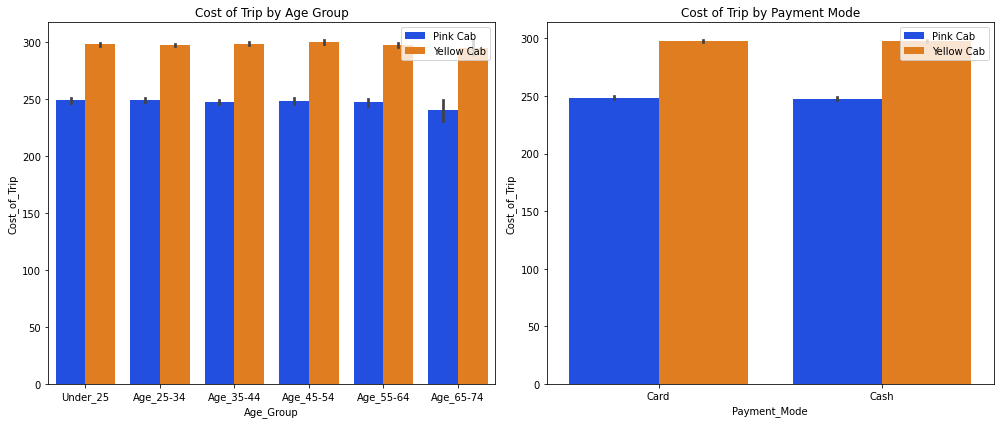

In [38]:
# cost of trip by age group and payment mode

fig, axes= plt.subplots(1,2, figsize= (14,6))

sns.barplot(data= master_data, ax=axes[0], x= 'Age_Group', y= 'Cost_of_Trip', hue= 'Company', palette= 'bright')
axes[0].legend( loc='upper right')
sns.barplot(data= master_data, ax=axes[1], x= 'Payment_Mode', y= 'Cost_of_Trip', hue= 'Company', palette= 'bright')
axes[1].legend( loc='upper right')

axes[0].set_title('Cost of Trip by Age Group')
axes[1].set_title('Cost of Trip by Payment Mode')


plt.tight_layout()

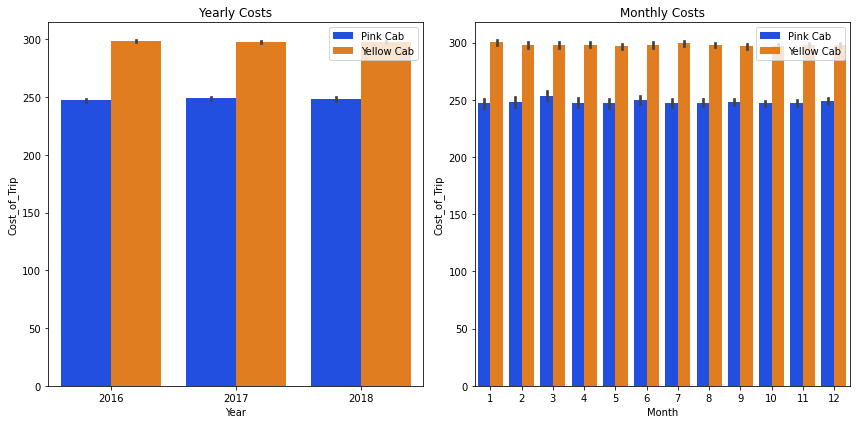

In [39]:
# cost of trip by season

fig, axes= plt.subplots(1,2, figsize= (12,6))

sns.barplot(data= master_data, ax=axes[0], x= 'Year', y= 'Cost_of_Trip', hue= 'Company', palette='bright')
axes[0].legend( loc='upper right')
sns.barplot(data= master_data, ax=axes[1], x= 'Month', y= 'Cost_of_Trip', hue= 'Company', palette='bright')
axes[1].legend( loc='upper right')

axes[0].set_title('Yearly Costs')
axes[1].set_title('Monthly Costs')

plt.tight_layout()

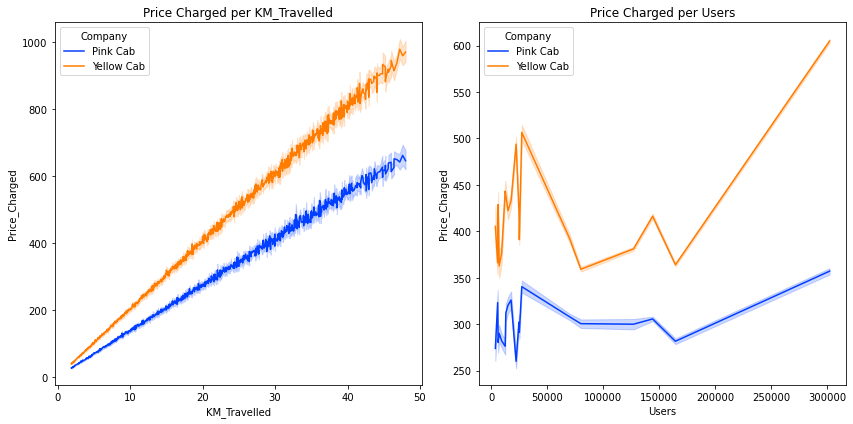

In [40]:
# Price charged per user and km travelled

fig, axes= plt.subplots(1,2, figsize= (12,6))

sns.lineplot(data= master_data, ax=axes[0], x= 'KM_Travelled', y= 'Price_Charged', palette='bright', hue= 'Company')
sns.lineplot(data= master_data, ax=axes[1], x= 'Users', y= 'Price_Charged',palette='bright', hue= 'Company')

axes[0].set_title('Price Charged per KM_Travelled')
axes[1].set_title('Price Charged per Users')

plt.tight_layout()

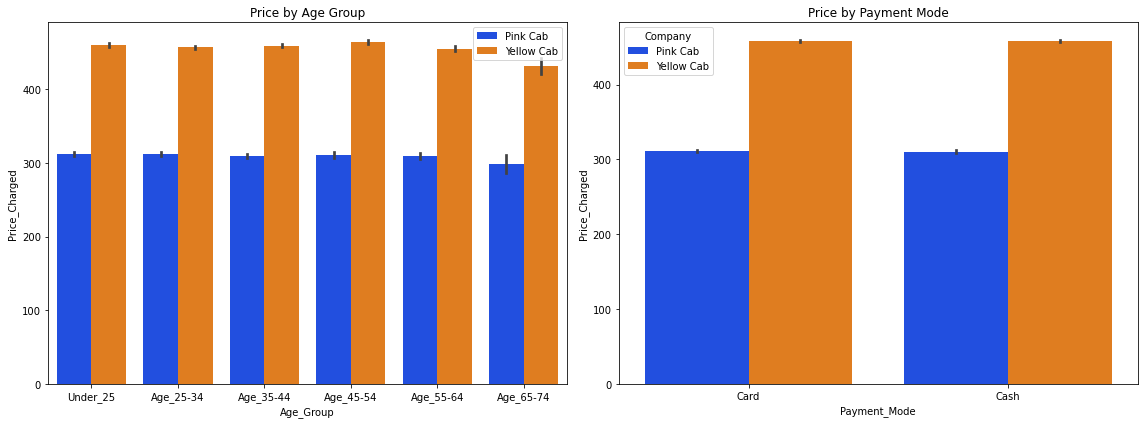

In [41]:
#  Price by age group and payment mode
fig, axes= plt.subplots(1,2, figsize= (16,6))

sns.barplot(data= master_data, ax=axes[0], x= 'Age_Group', y= 'Price_Charged', palette='bright', hue= 'Company')
axes[0].legend( loc='upper right')
sns.barplot(data= master_data, ax=axes[1], x= 'Payment_Mode', y= 'Price_Charged',palette='bright', hue= 'Company')

axes[0].set_title('Price by Age Group')
axes[1].set_title('Price by Payment Mode')

plt.tight_layout()

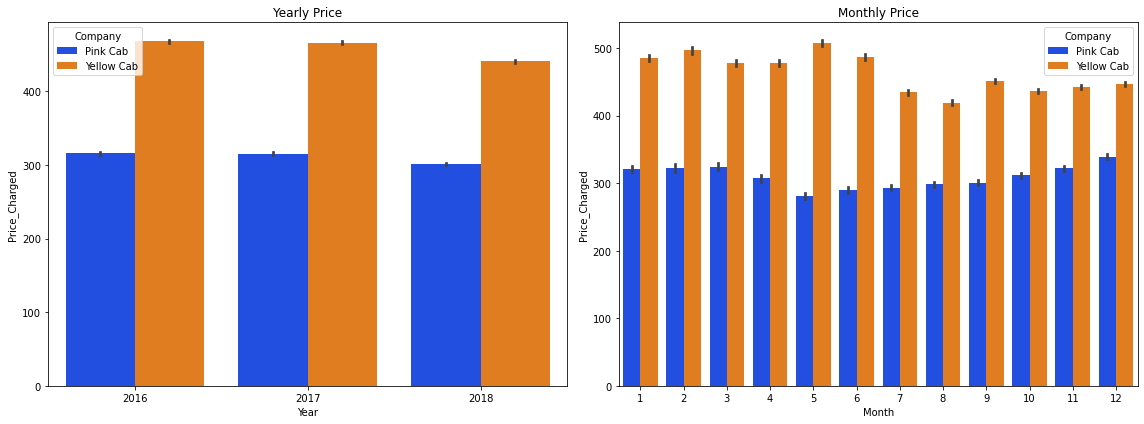

In [42]:
# Price by season 

fig, axes= plt.subplots(1,2, figsize= (16,6))

sns.barplot(data= master_data, ax=axes[0], x= 'Year', y= 'Price_Charged', hue= 'Company', palette= 'bright')
sns.barplot(data= master_data, ax=axes[1], x= 'Month', y= 'Price_Charged', hue= 'Company', palette= 'bright')

axes[0].set_title('Yearly Price')
axes[1].set_title('Monthly Price')

plt.tight_layout()

#### Profitability Analysis

In [43]:
# create a profit column 

master_data['Profit']= master_data['Price_Charged'] - master_data['Cost_of_Trip']

In [44]:
# Average annual profits
pd.DataFrame(master_data.groupby(['Year', 'Company']) ['Profit'].mean())

Profit
Year Company               
2016 Pink Cab     68.810861
     Yellow Cab  169.693701
2017 Pink Cab     66.714142
     Yellow Cab  168.416894
2018 Pink Cab     53.124295
     Yellow Cab  143.450759

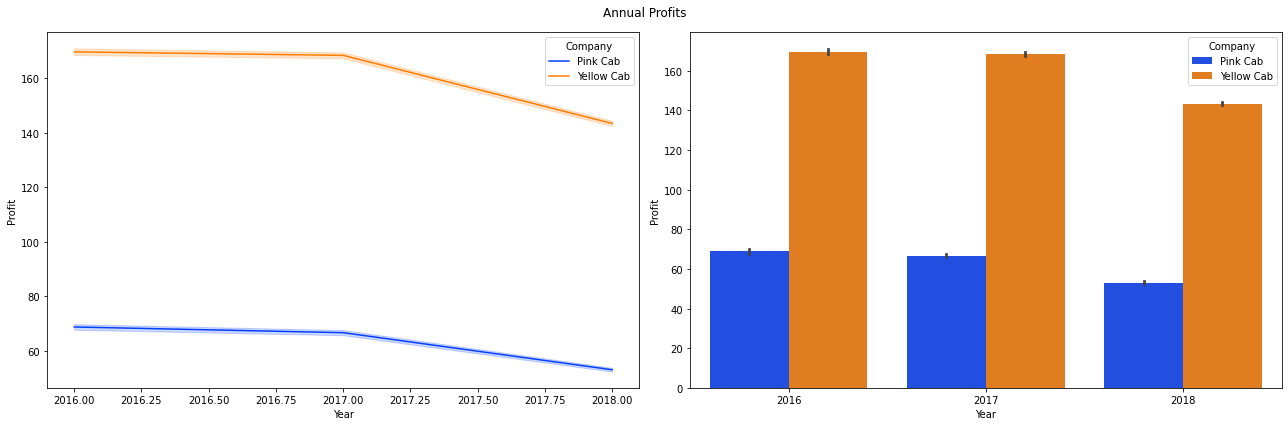

In [45]:
# Annual Profits

fig, axes= plt.subplots(1,2, figsize= (18,6))

sns.lineplot(data= master_data, ax=axes[0], x= 'Year', y= 'Profit', palette='bright',hue= 'Company', )
sns.barplot(data= master_data, ax=axes[1], x= 'Year', y= 'Profit',palette='bright', hue= 'Company')

fig.suptitle('Annual Profits')
plt.tight_layout()

In [46]:
# Average Monthly Profits

pd.DataFrame(master_data.groupby('Month') ['Profit'].mean())

,Profit
Month,
1,160.725641
2,176.258277
3,159.071523
4,156.878214
5,173.558958
6,153.422311
7,114.005729
8,103.773285
9,128.167477


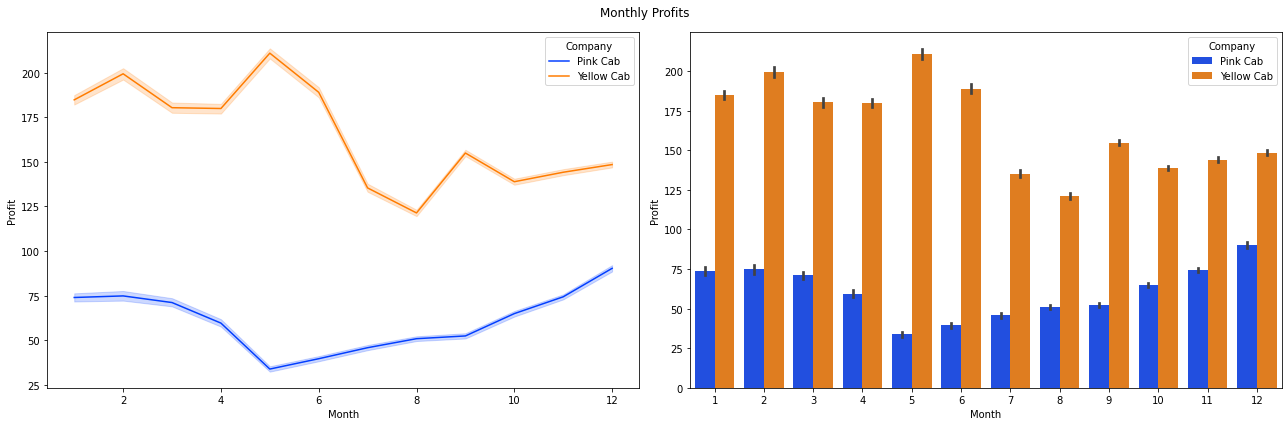

In [47]:
#  Monthly profits

fig, axes= plt.subplots(1,2, figsize= (18,6))

sns.lineplot(data= master_data, ax=axes[0], x= 'Month', y= 'Profit',palette='bright', hue= 'Company', )
sns.barplot(data= master_data, ax=axes[1], x= 'Month', y= 'Profit',palette='bright', hue= 'Company')

plt.suptitle('Monthly Profits')


plt.tight_layout()

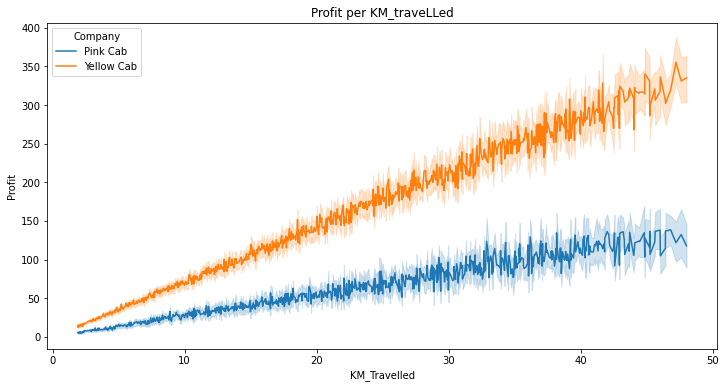

In [48]:
# profit per KM_traveLLed

plt.figure(figsize= (12,6))
sns.lineplot(data= master_data,  x= 'KM_Travelled', y= 'Profit', hue= 'Company')

plt.title('Profit per KM_traveLLed');

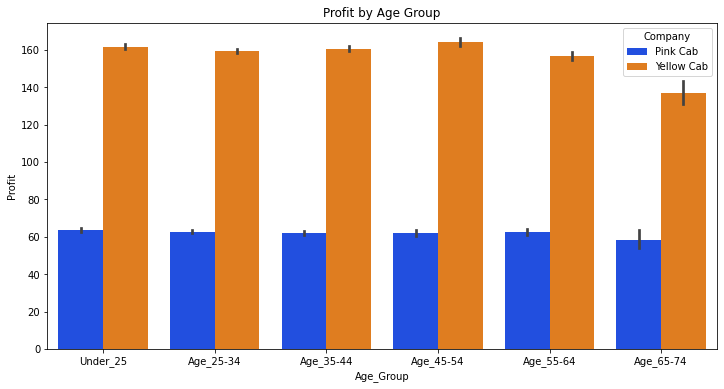

In [49]:
# Profit by age group

plt.figure(figsize= (12,6))
sns.barplot(data= master_data,  x= 'Age_Group', y= 'Profit', hue= 'Company', palette='bright');
plt.title('Profit by Age Group');


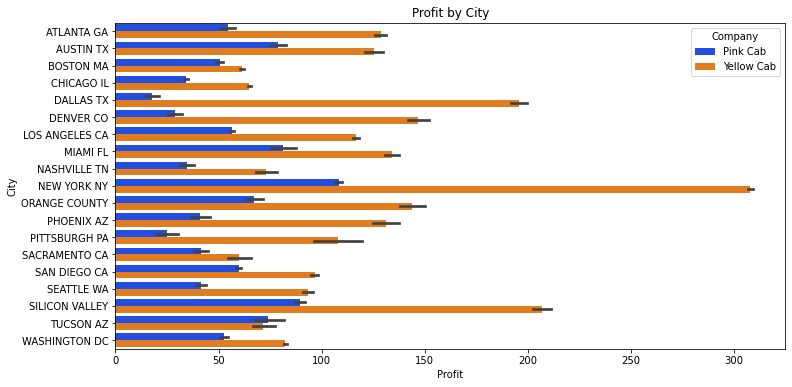

In [50]:
# Profits by City

plt.figure(figsize= (12,6))
sns.barplot(data= master_data,  x= 'Profit', y= 'City', hue= 'Company',palette='bright');
plt.title('Profit by City');


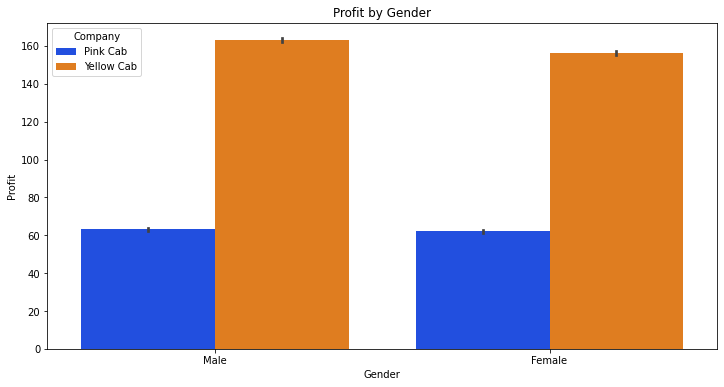

In [51]:
# Profits by Gender

plt.figure(figsize= (12,6))
sns.barplot(data= master_data,  x='Gender' , y= 'Profit', hue= 'Company',palette='bright');
plt.title('Profit by Gender');

#### Payment Mode

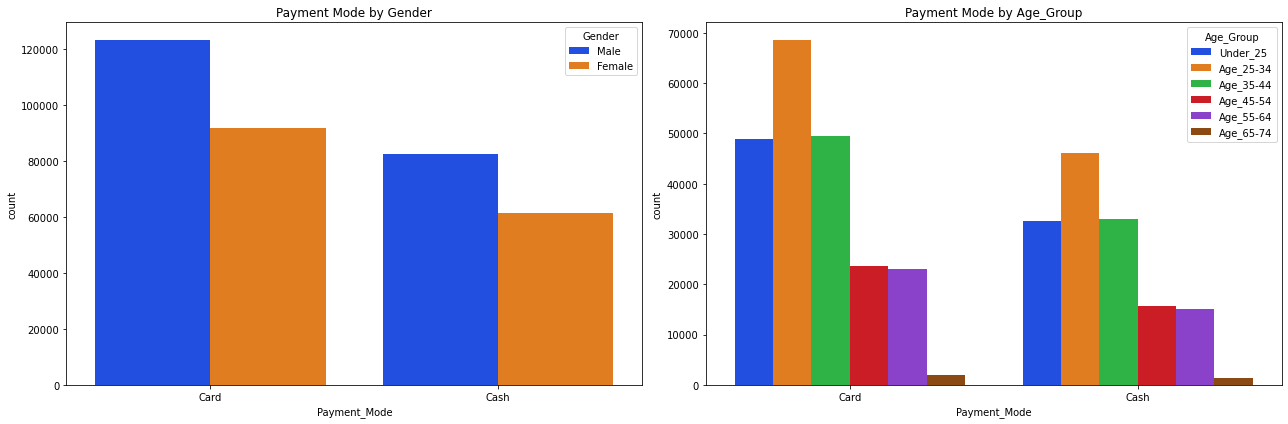

In [52]:
# Payment Mode by gender and Age group

fig, axes= plt.subplots(1,2, figsize= (18,6))

ax= sns.countplot(data= master_data, ax=axes[0], x= 'Payment_Mode',  hue= 'Gender',palette='bright')
ax= sns.countplot(data= master_data, ax=axes[1], x= 'Payment_Mode',  hue= 'Age_Group',palette='bright' )

axes[0].set_title('Payment Mode by Gender')
axes[1].set_title('Payment Mode by Age_Group')

plt.tight_layout()

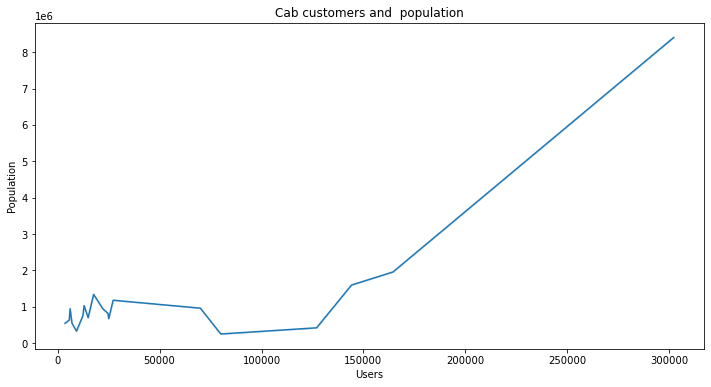

In [53]:
# Cab customers and  population size

plt.figure(figsize= (12,6))
sns.lineplot(data= master_data, x= 'Users', y='Population')

plt.title('Cab customers and  population');